In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys

sys.path.insert(0, '/Users/josue/kosmos/')


In [8]:
import kosmos
DISPLAY = True

In [9]:
kosmos.__version__

'0.1'

In [81]:
#checks the filter
def what_filter(k):
    j = []
    for i in k:
        hdu_list = fits.open(i)
        a = hdu_list[0].header['FILTER']
        j.append(a)
    print("Filters:")
    return j

## 1.Bias

In [10]:
dir = 'C:/Users/josue/!Work space/data/07072022/07072022/'
biasfiles_i = pd.read_table(dir + 'bias_07.txt', names=['impath'])
biasfiles = dir + biasfiles_i['impath'].values
biasfiles

array(['C:/Users/josue/!Work space/data/07072022/07072022/bias_01.fits',
       'C:/Users/josue/!Work space/data/07072022/07072022/bias_02_001.fits',
       'C:/Users/josue/!Work space/data/07072022/07072022/bias_02_002.fits'],
      dtype=object)

(512, 512)


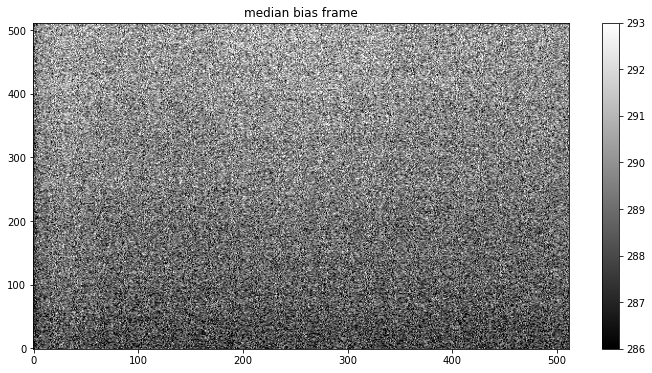

In [11]:
bias = kosmos.biascombine(biasfiles) 
print(bias.shape)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(bias, origin='lower', aspect='auto', cmap=plt.cm.gray)
    plt.title('median bias frame')
    plt.clim(np.percentile(bias, (5, 98)))
    cb = plt.colorbar()

In [93]:
np.mean(bias)

masked_array(data=289.31763458,
             mask=False,
       fill_value=1e+20)

## 2.Flats

In [64]:
def dir_array(j):
    i = pd.read_table(dir + j, names=['impath'])
    k = dir + i['impath'].values
    #print(k)
    return k

In [95]:
# sky flats in the B filter
flatfiles = dir_array('sky_flats.txt')
# sky flats in another filter
other_flats = dir_array('diff_filter.txt')
# sky flat in r filter
r_flats = dir_array('sky_flat_r.txt')

In [82]:
# checks to see if every flat is the same filter
print(what_filter(flatfiles))
print(what_filter(other_flats))
print(what_filter(r_flats))

Filters:
['B', 'B', 'B', 'B', 'B', 'B', 'B']
Filters:
['V', 'V', 'V', 'V', 'V', 'V', 'V']
Filters:
['r', 'r', 'r', 'r', 'r', 'r', 'r']


(512,)
(512, 512)
adu / s


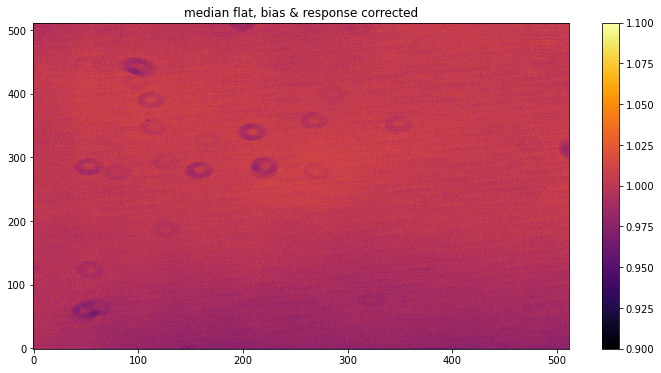

In [88]:
# B filter master flat
flat_B, ilum_B = kosmos.flatcombine(flatfiles, bias=bias, trim=None)

print(ilum_B.shape) # this is the indicies that are illuminated
print(flat_B.shape)
print(flat_B.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat_B, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median flat, bias & response corrected')
    cb = plt.colorbar()

(512,)
(512, 512)
adu / s


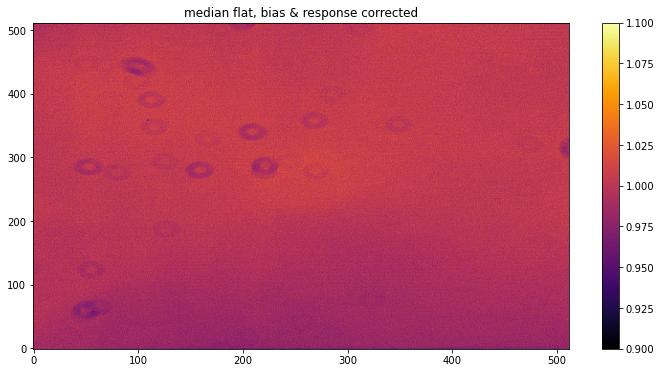

In [89]:
# V filter master flats
flat_V, ilum_V = kosmos.flatcombine(other_flats, bias=bias, trim=None)

print(ilum_V.shape) # this is the indicies that are illuminated
print(flat_V.shape)
print(flat_V.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat_V, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median flat, bias & response corrected')
    cb = plt.colorbar()

(512,)
(512, 512)
adu / s


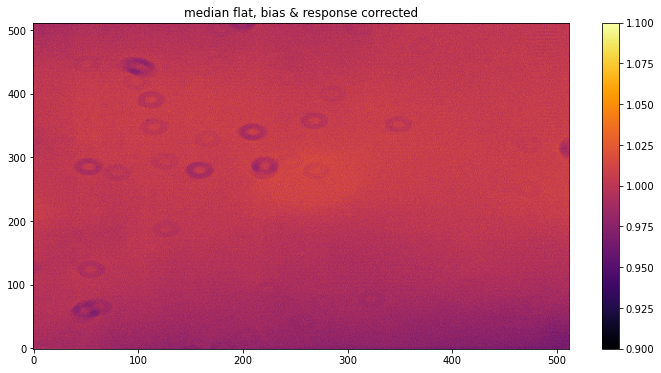

In [90]:
# r filter master flats
flat_r, ilum_r = kosmos.flatcombine(r_flats, bias=bias, trim=None)

print(ilum_r.shape) # this is the indicies that are illuminated
print(flat_r.shape)
print(flat_r.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat_r, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median flat, bias & response corrected')
    cb = plt.colorbar()

(512, 512)
adu / s
(512, 512)
adu / s
(512, 512)
adu / s
(512, 512)
adu / s
(512, 512)
adu / s
(512, 512)
adu / s
(512, 512)
adu / s


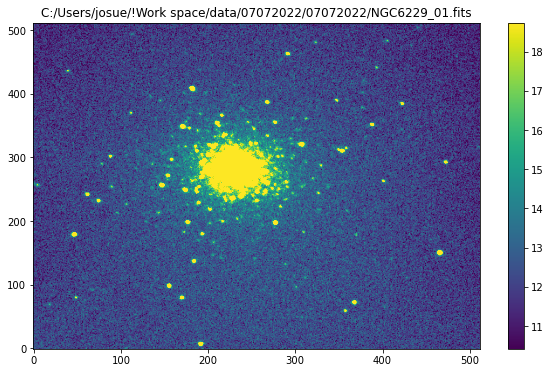

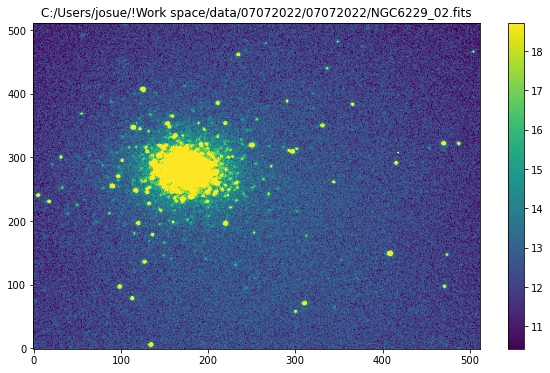

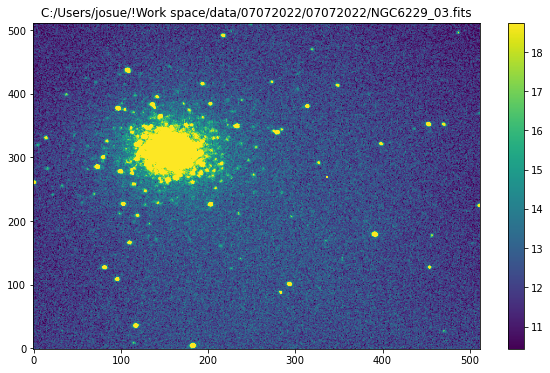

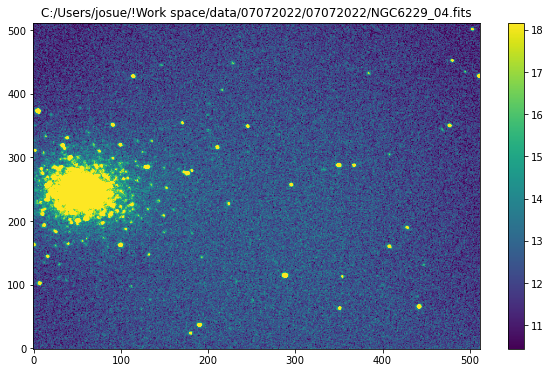

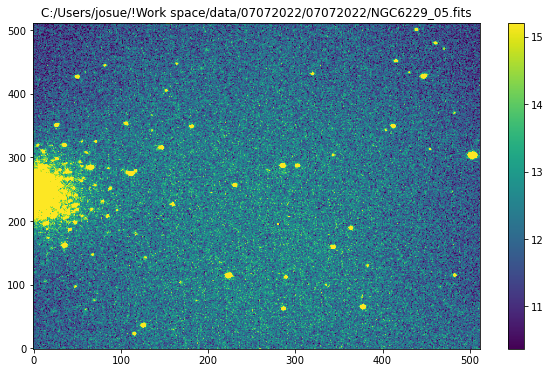

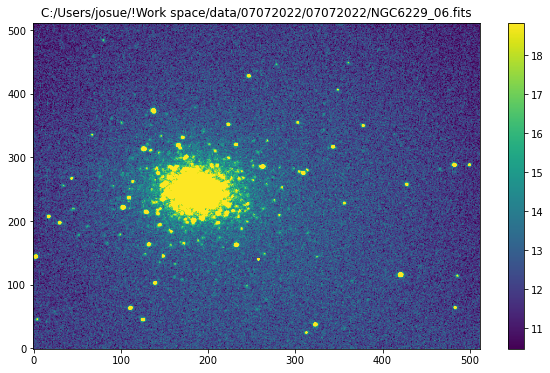

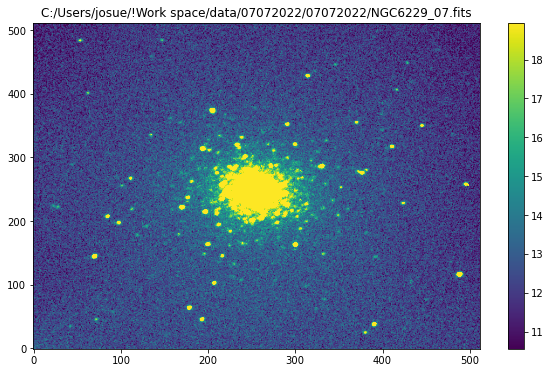

In [91]:
for i in NGC6229:
    sci = i 
    sciimg = kosmos.proc(sci, bias=bias, ilum=ilum, flat=flat_r, trim=None)

    print(sciimg.shape)
    print(sciimg.unit)

    if DISPLAY:
        plt.figure(figsize=(10,6))
        plt.imshow(sciimg, origin='lower', aspect='auto')
        plt.clim(np.percentile(sciimg, (5, 98)))
        cb = plt.colorbar()
        plt.title(sci)

In [87]:
what_filter(NGC6229)

Filters:


['r', 'r', 'r', 'r', 'r', 'r', 'r']

(512, 512)
adu / s


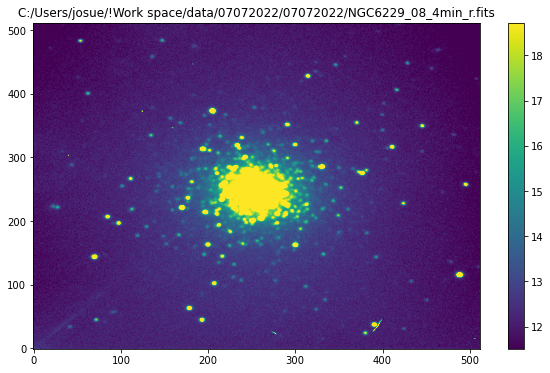

In [79]:
# NGC 6229 in the r filter
sci = dir + 'NGC6229_08_4min_r.fits' 
sciimg = kosmos.proc(sci, bias=bias, ilum=ilum, flat=flat_r, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)

(512, 512)
adu / s


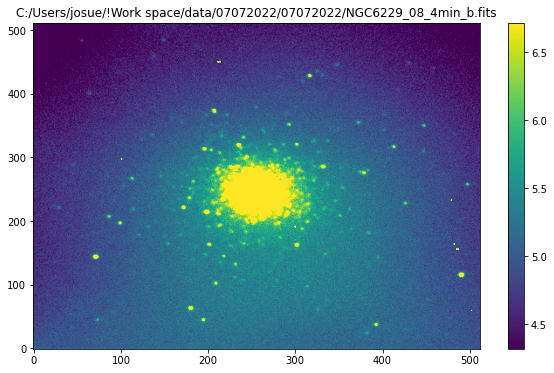

In [85]:
# NGC 6229 in the B filter at 4 min exp
sci = dir + 'NGC6229_08_4min_b.fits' 
sciimg = kosmos.proc(sci, bias=bias, ilum=ilum, flat=flat_B, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)

(512, 512)
adu / s


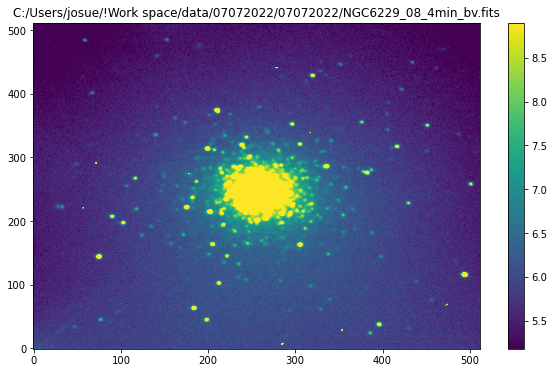

In [86]:
# NGC 6229 in the V filter at 4 min exp
sci = dir + 'NGC6229_08_4min_bv.fits' 
sciimg = kosmos.proc(sci, bias=bias, ilum=ilum, flat=flat_V, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)